# Controllability

#### Importing Model

In [3]:
import numpy as np
import torch
import sys
import matplotlib.pyplot as plt
sys.path.insert(0, "../../SemanticStyleGAN")
from visualize.utils import generate
from utils.control import Control
from numpy import mean
from numpy import cov
from numpy.linalg import eig


ImportError: /misc/no_backups/g013/.cache/torch_extensions/py39_cu113/fused/fused.so: cannot open shared object file: No such file or directory

## Main Control

In [4]:
ckpt= "/no_backups/g013/checkpoints/SSG_v3.13/ckpt/140000.pt"
device="cpu"
control = Control(ckpt,device)

NameError: name 'Control' is not defined

In [6]:
latent= "../results/saved_samples/first_latent.npy"
styles = torch.tensor(np.load(latent), device=device)
styles = styles.unsqueeze(1).repeat(1, control.model.n_latent, 1)


latent1= "../results/saved_samples/first_latent.npy"
latent2= "../results/saved_samples/second_latent.npy"
latent3= "../results/saved_samples/third_latent.npy"
latent4="../results/saved_samples/fourth_latent.npy"
latent5="../results/saved_samples/fifth_latent.npy"
latent6="../results/saved_samples/sixth_latent.npy"
latent7="../results/saved_samples/seventh_latent.npy"
styles1 = torch.tensor(np.load(latent1), device=device)
styles2 = torch.tensor(np.load(latent2), device=device)
styles3 = torch.tensor(np.load(latent3), device=device)
styles4 = torch.tensor(np.load(latent4), device=device)
styles5 = torch.tensor(np.load(latent5), device=device)
styles6 = torch.tensor(np.load(latent6), device=device)
styles7 = torch.tensor(np.load(latent7), device=device)

styles1 = styles1.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles2 = styles2.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles3 = styles3.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles4 = styles4.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles5 = styles5.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles6 = styles6.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles7 = styles7.unsqueeze(1).repeat(1, control.model.n_latent, 1)

#### Functions Editing Latent Space


Class percentage is 0.0


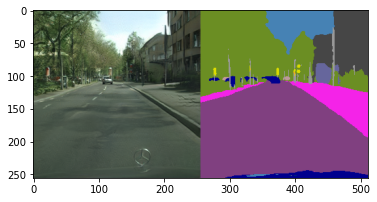

In [7]:
# #Gradual increase of a certain dimension

# #styles_x[0,latent_index,200:400]-=10
# old_dist = 0 
# class_index = 1##Road
# class_index = 2##SideWalk
# class_index = 3##Building
# class_index = 4##Wall
# class_index = 9##Vegitation
# class_index = 10##Sky
# class_index = 11##Person
# # class_index = 13##Car
# latent_index=class_index*2+2
# images=[]
# segs=[]
# for i in np.arange(-10,10,0.4):
#     image,seg=control.edit_image(latent_index,class_index,change_factor=i*0.1,styles=styles1,addition=True,plot=True)
#     images.append(image[0])
#     segs.append(seg[0])
#     break
# #control.images_to_video(images,segs,"./data/interp_videos/latent_manipulation_person_class.mp4")

torch.Size([1, 3, 512, 512])


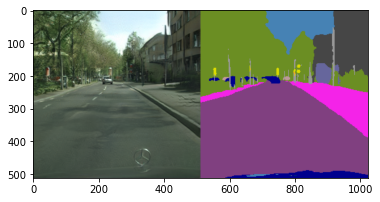

In [20]:
# img_2 = torch.nn.functional.interpolate(torch.tensor(images[0]).permute(2,0,1).unsqueeze(0),size=[512,512])
# seg_2 = torch.nn.functional.interpolate(torch.tensor(segs[0]).permute(2,0,1).unsqueeze(0),size=[512,512])
# print(seg_2.shape)
# plt.imshow(np.concatenate((img_2.squeeze(0).permute(1,2,0), seg_2.squeeze(0).permute(1,2,0)), 1))
# plt.show()

In [12]:
# for i in np.arange(-10,10,0.4):
#     image,seg=control.edit_texture(class_index,change_factor=i*0.1,latent_index=None,styles=styles1,addition=True,plot=True)
#     images.append(image[0])
#     segs.append(seg[0])
#     break

NameError: name 'control' is not defined

## Studying 3 Images (interpolation and FSD calculation)

#### Load 3 Images

In [9]:
latent1= "../results/saved_samples/first_latent.npy"
latent2= "../results/saved_samples/second_latent.npy"
latent3= "../results/saved_samples/third_latent.npy"
latent4="../results/saved_samples/fourth_latent.npy"
latent5="../results/saved_samples/fifth_latent.npy"
latent6="../results/saved_samples/sixth_latent.npy"
latent7="../results/saved_samples/seventh_latent.npy"
styles1 = torch.tensor(np.load(latent1), device=device)
styles2 = torch.tensor(np.load(latent2), device=device)
styles3 = torch.tensor(np.load(latent3), device=device)
styles4 = torch.tensor(np.load(latent4), device=device)
styles5 = torch.tensor(np.load(latent5), device=device)
styles6 = torch.tensor(np.load(latent6), device=device)
styles7 = torch.tensor(np.load(latent7), device=device)

styles1 = styles1.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles2 = styles2.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles3 = styles3.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles4 = styles4.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles5 = styles5.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles6 = styles6.unsqueeze(1).repeat(1, control.model.n_latent, 1)
styles7 = styles7.unsqueeze(1).repeat(1, control.model.n_latent, 1)

In [11]:
image1, seg1 = generate(
    control.model,
    styles1[0].unsqueeze(0),
    mean_latent=control.mean_latent,
    randomize_noise=False,
    batch_size=control.batch,
)
image2, seg2 = generate(
    control.model,
    styles2[0].unsqueeze(0),
    mean_latent=control.mean_latent,
    randomize_noise=False,
    batch_size=control.batch,
)
image3, seg3 = generate(
    control.model,
    styles3[0].unsqueeze(0),
    mean_latent=control.mean_latent,
    randomize_noise=False,
    batch_size=control.batch,
)
## Each image alongside it's class distribution metric
mean_val1 = control.get_class_dist(seg1[0])
car_percentage1=(mean_val1[0][13]/mean_val1.sum())*100
print(car_percentage1)
plt.imshow(np.concatenate((image1[0],seg1[0]),1))
plt.show()

mean_val2 = control.get_class_dist(seg2[0])
car_percentage2=(mean_val2[0][13]/mean_val2.sum())*100
print(car_percentage2)
plt.imshow(np.concatenate((image2[0],seg2[0]),1))
plt.show()

mean_val3 = control.get_class_dist(seg3[0])
car_percentage3=(mean_val3[0][13]/mean_val3.sum())*100
print(car_percentage3)
plt.imshow(np.concatenate((image3[0],seg3[0]),1))
plt.show()




TypeError: get_class_dist() missing 1 required positional argument: 'color_map'

1) the 3 images used have an increase in probability starting from one to three
2) The less the sum of this latent variable the less 

In [52]:
## Exploring the sum of the car latent index
latent_index=28
latent_name="car_shape"

print(f'latent sum for first image is : {styles1[0:latent_index].sum()}, which has car dist of {car_percentage1}')
print(f'latent sum for second image is : {styles2[0:latent_index].sum()}, which has car dist of {car_percentage2}')
print(f'latent sum for third image is : {styles3[0:latent_index].sum()}, which has car dist of {car_percentage3}')

latent sum for first image is : 8848.599609375, which has car dist of 3.045654296875
latent sum for second image is : 8289.8193359375, which has car dist of 8.0230712890625
latent sum for third image is : 7534.4423828125, which has car dist of 14.459228515625


#### Injecting one image into another

In [53]:
#Image 1 and 2
latent_sum_dist = styles2[0:latent_index].sum() - styles1[0:latent_index].sum()
dist_distance=car_percentage2-car_percentage1
print(f'Distance between latent vars of image 2 and 1 :{latent_sum_dist}  distance in distribution :{dist_distance}')
#Image 2 and 3 
latent_sum_dist = styles3[0:latent_index].sum() - styles2[0:latent_index].sum()
dist_distance=car_percentage3-car_percentage2
print(f'Distance between latent vars of image 3 and 2 :{latent_sum_dist}  distance in distribution :{dist_distance}')

Distance between latent vars of image 2 and 1 :-558.7802734375  distance in distribution :4.9774169921875
Distance between latent vars of image 3 and 2 :-755.376953125  distance in distribution :6.4361572265625


length of style is 1
style shape is torch.Size([1, 34, 512])
n_latent is 34
Latent shape is torch.Size([1, 160, 512])
self.local : 16
Image 1 


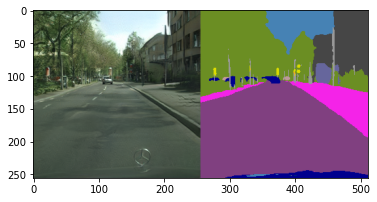

Image 3 


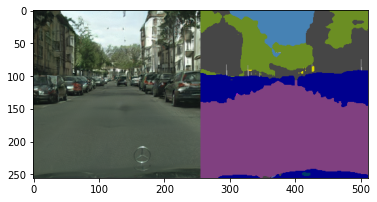

Combined Image


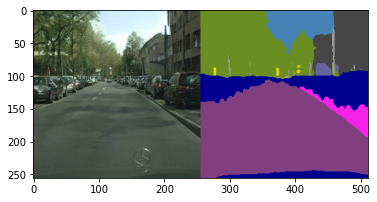

latent sum after edit is : 8809.9482421875 and dist_percentage is 14.16778564453125


In [60]:
## Exploring what would happen if we feed the shape's latent vector for the car from image 3 to 1
styles1_edited = styles1.clone().detach()
styles1_edited[0,latent_index] = styles3[0,latent_index]

image1_edited, seg1_edited = generate(
    model,
    styles1_edited[0].unsqueeze(0),
    mean_latent=mean_latent,
    randomize_noise=False,
    batch_size=batch,
)

latent_sum = styles1_edited[0:latent_index].sum()
mean_val1_edited = get_class_dist(seg1_edited[0],color_map)
car_percentage1_edited=(mean_val1_edited[0][13]/mean_val1_edited.sum())*100

print(f"Image 1 ")
plt.imshow(np.concatenate((image1[0],seg1[0]),1))
plt.show()
print(f"Image 3 ")
plt.imshow(np.concatenate((image3[0],seg3[0]),1))
plt.show()
print(f"Combined Image")
plt.imshow(np.concatenate((image1_edited[0],seg1_edited[0]),1))
plt.show()

print(f'latent sum after edit is : {latent_sum} and dist_percentage is {car_percentage1_edited}')


Conclusion: You can take the cars of one image and directly inject it into another with generating a plausible image

#### Trying to find a latent direction for cars using PCA in the W space

In [14]:
# Goal is w0 = w + Vx
def calculate_pca_1(model,n_samples=10000,n_components=10):
    '''
    Calculates PCA and return the V of shape n_components X model.style_dim    
    '''
    styles = model.style(
            torch.randn(n_samples, model.style_dim, device="cpu")
        )
    pca_res = torch.pca_lowrank(styles,q=n_components)
    V = pca_res[2].permute(1,0)
    print(f"Shape of output V from PCA is: {V.shape} ")
    return V
    
def calculate_pca_2(model,n_samples=10000,n_components=10):
    styles = model.style(
            torch.randn(n_samples, model.style_dim, device="cpu")
        )
    M = mean(styles)
    C = styles-M
    V_2=cov(C.T)
    _, vectors = eig(V_2) #Returns values and vectors
    return vectors[:n_components]

In [12]:
#V= calculate_pca(model)
#torch.save(V,"principal_components.pt")

#V = torch.load("data/principal_components/principal_components.pt") #output from pytorch
V = torch.load("data/principal_components/principal_components_2.pt") #Manual output
#V = torch.load("data/principal_components/useless_principal_components.pt") #Useless output

Analyzing COMPONENT 0
Class percentage is 9.35821533203125


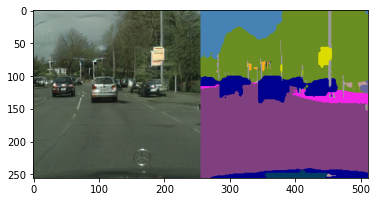

Class percentage is 6.01043701171875


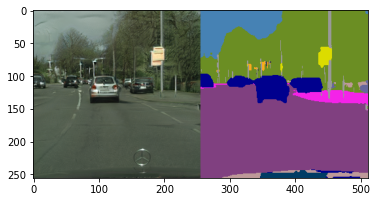

Analyzing COMPONENT 1
Class percentage is 5.926513671875


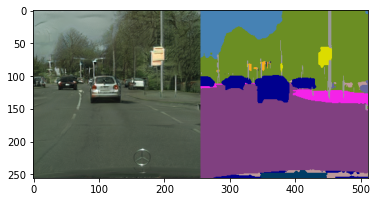

Class percentage is 10.711669921875


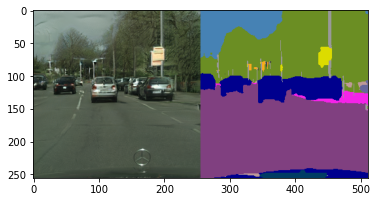

Analyzing COMPONENT 2
Class percentage is 7.74383544921875


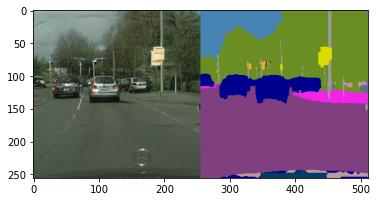

Class percentage is 8.97216796875


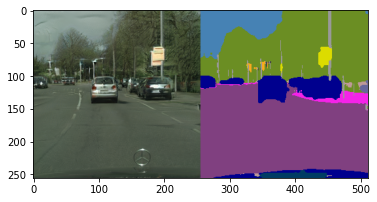

Analyzing COMPONENT 3
Class percentage is 6.55670166015625


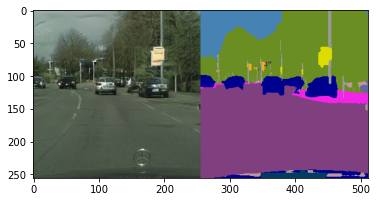

Class percentage is 9.26666259765625


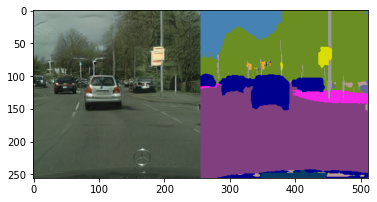

Analyzing COMPONENT 4
Class percentage is 8.953857421875


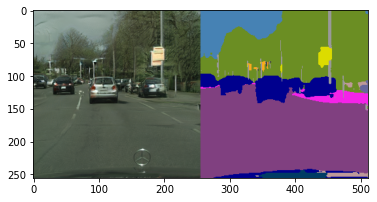

Class percentage is 6.25152587890625


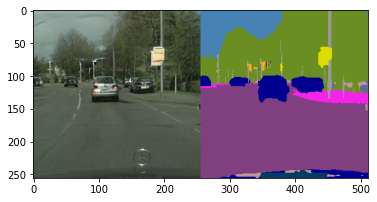

Analyzing COMPONENT 5
Class percentage is 9.4573974609375


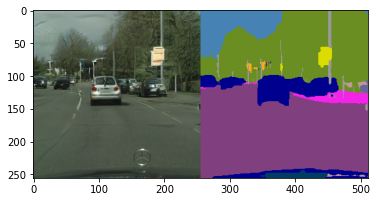

Class percentage is 5.93109130859375


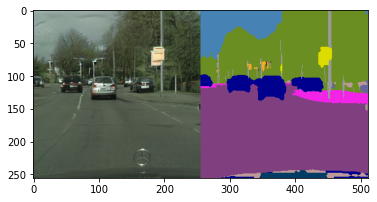

Analyzing COMPONENT 6


KeyboardInterrupt: 

In [13]:
## Applying 10 PC components to image 1 
apply_to_all_layers=False
latent_index=28 #Car
class_index=13

# latent_index=20 #Vegitation
# class_index=9
latent_name="car_shape"
multiplier=10

for component in range(min(10,V.size(0))):
    print(f"Analyzing COMPONENT {component}")
    control.edit_image_principal_component(latent_index,class_index,multiplier,styles2,V[component])
    control.edit_image_principal_component(latent_index,class_index,-multiplier,styles2,V[component])

In [14]:
## Effects of continous changing of 1 component
apply_to_all_layers=False
latent_index=28
class_index=13
latent_name="car_shape"
component=9

# chain_1 = range(0,0,1) # Set aside for now 
# chain_2 =  np.arange(10,-10,-0.1)
# mult_range = chain(chain_1,chain_2)

for component in [6]:
    print(f"Processing component {component}")
    for i,style_chosen in enumerate([styles1,styles2,styles3,styles4,styles5,styles6,styles7]):
        print(f"Styles{i+1}")       
        images=[]
        segs=[]
        for multiplier in  np.arange(30,-40,-1):
            #print(f"Analyzing COMPONENT {component} with multiplier {multiplier}")
            image,seg=control.edit_image_principal_component(latent_index,class_index,multiplier,style_chosen,V[component],whole_image=apply_to_all_layers,plot=False,get_image=True)
            images.append(image[0])
            segs.append(seg[0])
        # images = images + images[::-1]
        # segs= segs + segs[::-1]
       # images_to_video(images,segs,f"./data/pca_control_2/editing_principal_component_{component}_for_car{i+1}.mp4")


Processing component 6
Styles1


In [62]:
## Combined effect
for i,style_chosen in enumerate([styles1,styles2,styles3,styles4,styles5,styles6,styles7]):
    print(f"Styles{i+1}")       
    images=[]
    segs=[]
    for multiplier in  np.arange(30,-40,-1):
        #print(f"Analyzing COMPONENT {component} with multiplier {multiplier}")
        component_list = [V[1],V[3]]
        image,seg=edit_image_principal_component(latent_index,class_index,multiplier,style_chosen,component_list,whole_image=apply_to_all_layers,plot=False,get_image=True)
        images.append(image[0])
        segs.append(seg[0])

    images_to_video(images,segs,f"./data/pca_control_2/editing_principal_components_1_3_for_car{i+1}.mp4")


Styles1
Styles2
Styles3
Styles4
Styles5
Styles6
Styles7
